<a href="https://colab.research.google.com/github/somosnlp/llm-arena/blob/main/An%C3%A1lisis_Linguistico_Arena_estilos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribuci√≥n de estilos discursivos

Mounted at /content/drive


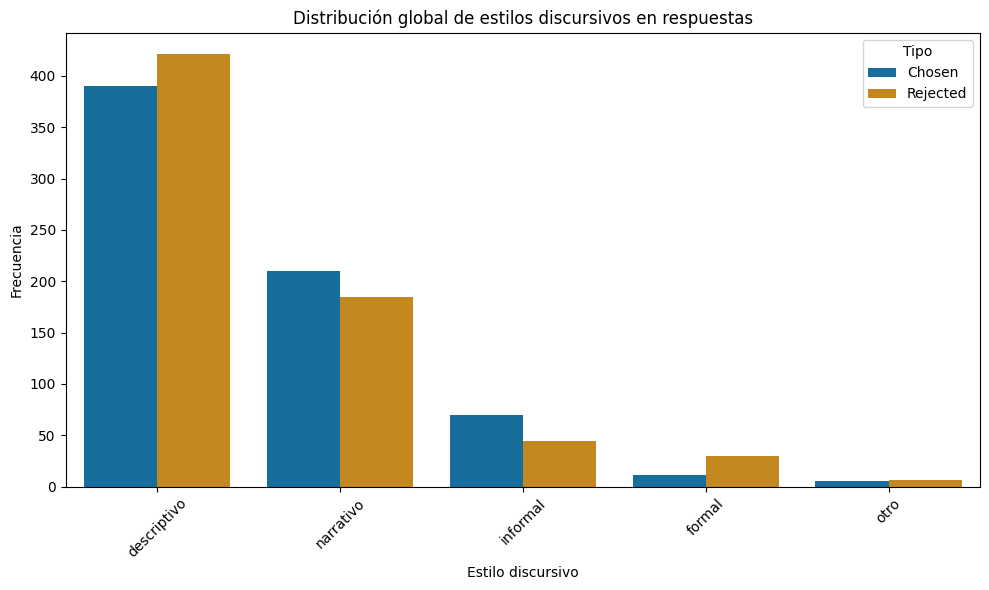

‚úÖ Gr√°fico guardado en: /content/drive/MyDrive/graficos_dpo/distribucion_estilos_chosen_vs_rejected.png


In [ ]:
# üì¶ Instalar librer√≠as necesarias
!pip install -q matplotlib seaborn pandas

# üìö Importar librer√≠as
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# üîó Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# üìÇ Definir carpeta de salida
output_folder = "/content/drive/MyDrive/graficos_dpo"
os.makedirs(output_folder, exist_ok=True)

# üì• Cargar dataset con estilos discursivos
file_path = "/content/dataset_con_estilos.csv"  # Cambia si el archivo est√° en otra ruta
df_estilos = pd.read_csv(file_path)

# üéØ Contar frecuencia de estilos para chosen y rejected
estilos_chosen = df_estilos["estilo_chosen"].value_counts().reset_index()
estilos_chosen.columns = ["Estilo", "Frecuencia"]
estilos_chosen["Tipo"] = "Chosen"

estilos_rejected = df_estilos["estilo_rejected"].value_counts().reset_index()
estilos_rejected.columns = ["Estilo", "Frecuencia"]
estilos_rejected["Tipo"] = "Rejected"

# üîó Unir los datos
df_estilos_total = pd.concat([estilos_chosen, estilos_rejected])

# üé® Crear gr√°fico de barras
plt.figure(figsize=(10, 6))
sns.set_palette("colorblind")
sns.barplot(data=df_estilos_total, x="Estilo", y="Frecuencia", hue="Tipo")
plt.title("Distribuci√≥n global de estilos discursivos en respuestas")
plt.xlabel("Estilo discursivo")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.tight_layout()

# üíæ Guardar gr√°fico
output_path = f"{output_folder}/distribucion_estilos_chosen_vs_rejected.png"
plt.savefig(output_path)
plt.show()

print(f"‚úÖ Gr√°fico guardado en: {output_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


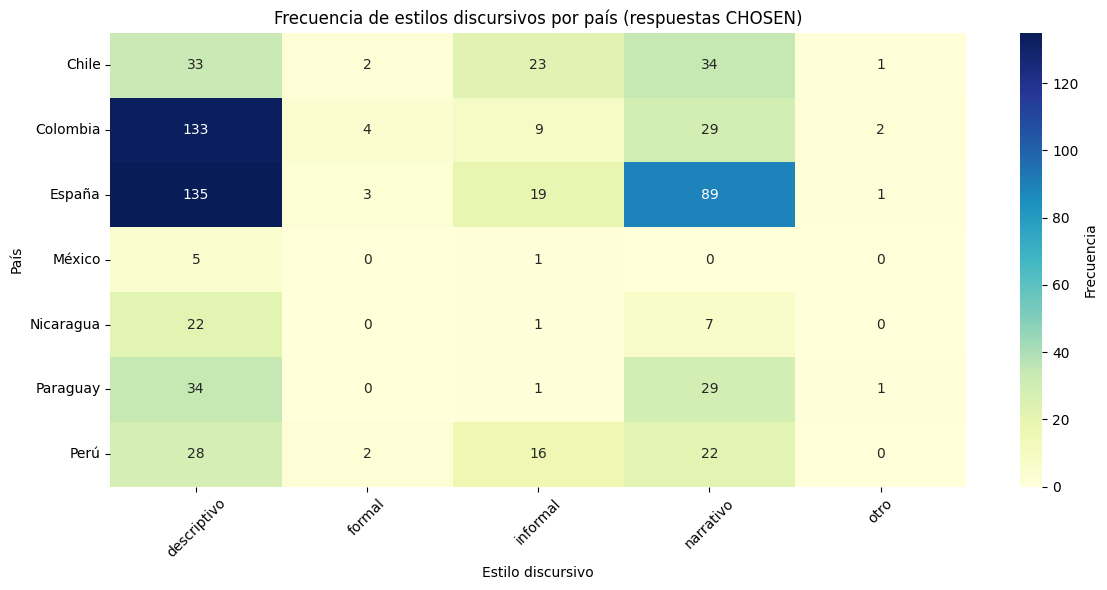

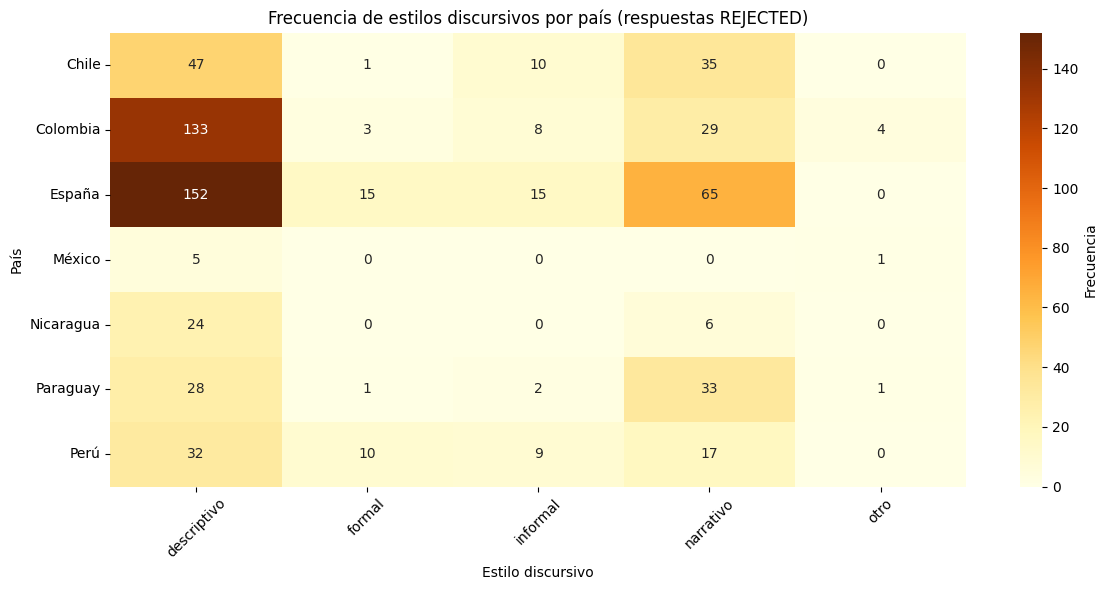

‚úÖ Gr√°ficos guardados en:
CHOSEN  ‚û§ /content/drive/MyDrive/graficos_dpo/heatmap_estilos_por_pais_chosen.png
REJECTED ‚û§ /content/drive/MyDrive/graficos_dpo/heatmap_estilos_por_pais_rejected.png


In [ ]:
# üì¶ Instalar dependencias necesarias
!pip install -q pandas seaborn matplotlib

# üìö Importar librer√≠as
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# üîó Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# üìÇ Crear carpeta de salida
output_folder = "/content/drive/MyDrive/graficos_dpo"
os.makedirs(output_folder, exist_ok=True)

# üì• Cargar dataset
file_path = "/content/dataset_con_estilos.csv"  # Ajusta si est√° en otra ubicaci√≥n
df = pd.read_csv(file_path)

# üìä Heatmap para respuestas CHOSEN
tabla_chosen = pd.crosstab(df["country"], df["estilo_chosen"])
plt.figure(figsize=(12, 6))
sns.heatmap(tabla_chosen, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={"label": "Frecuencia"})
plt.title("Frecuencia de estilos discursivos por pa√≠s (respuestas CHOSEN)")
plt.xlabel("Estilo discursivo")
plt.ylabel("Pa√≠s")
plt.xticks(rotation=45)
plt.tight_layout()
heatmap_chosen_path = f"{output_folder}/heatmap_estilos_por_pais_chosen.png"
plt.savefig(heatmap_chosen_path)
plt.show()

# üìä Heatmap para respuestas REJECTED
tabla_rejected = pd.crosstab(df["country"], df["estilo_rejected"])
plt.figure(figsize=(12, 6))
sns.heatmap(tabla_rejected, annot=True, fmt="d", cmap="YlOrBr", cbar_kws={"label": "Frecuencia"})
plt.title("Frecuencia de estilos discursivos por pa√≠s (respuestas REJECTED)")
plt.xlabel("Estilo discursivo")
plt.ylabel("Pa√≠s")
plt.xticks(rotation=45)
plt.tight_layout()
heatmap_rejected_path = f"{output_folder}/heatmap_estilos_por_pais_rejected.png"
plt.savefig(heatmap_rejected_path)
plt.show()

print("‚úÖ Gr√°ficos guardados en:")
print("CHOSEN  ‚û§", heatmap_chosen_path)
print("REJECTED ‚û§", heatmap_rejected_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


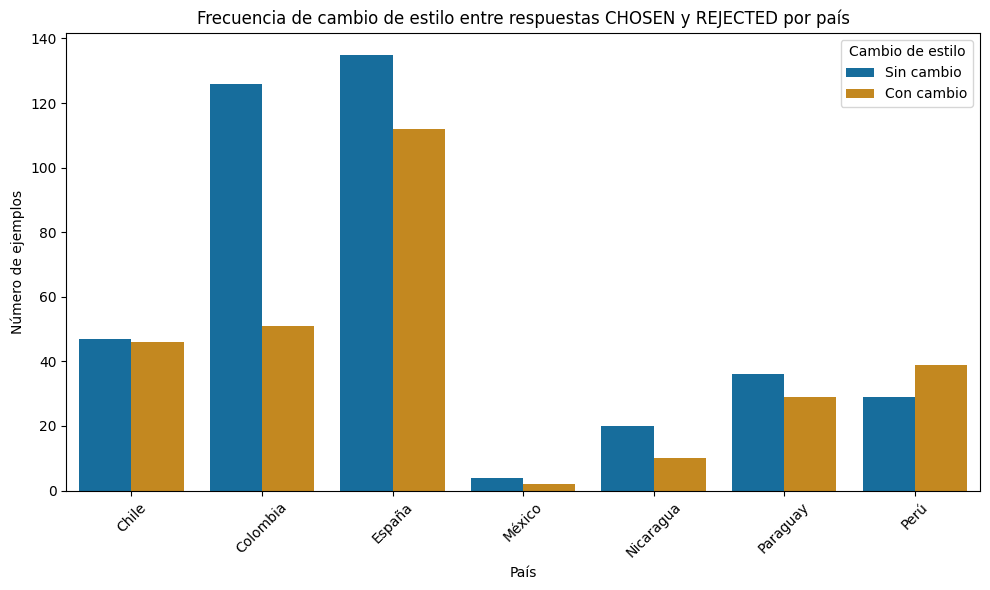

‚úÖ Gr√°fico guardado en: /content/drive/MyDrive/graficos_dpo/cambios_estilo_por_pais.png


In [ ]:
# üì¶ Instalar dependencias necesarias
!pip install -q pandas seaborn matplotlib

# üìö Importar librer√≠as
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# üîó Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# üìÇ Crear carpeta de salida
output_folder = "/content/drive/MyDrive/graficos_dpo"
os.makedirs(output_folder, exist_ok=True)

# üì• Cargar dataset
file_path = "/content/dataset_con_estilos.csv"  # Ajusta si est√° en otra ubicaci√≥n
df = pd.read_csv(file_path)

# üîç Identificar si hubo cambio de estilo entre chosen y rejected
df["cambio_estilo"] = df["estilo_chosen"] != df["estilo_rejected"]

# üìä Crear tabla resumen de cambios por pa√≠s
tabla_cambios = df.groupby("country")["cambio_estilo"].value_counts().unstack(fill_value=0)
tabla_cambios.columns = ["Sin cambio", "Con cambio"]
tabla_cambios = tabla_cambios.reset_index().melt(id_vars="country", var_name="Cambio de estilo", value_name="Frecuencia")

# üé® Gr√°fico de barras
plt.figure(figsize=(10, 6))
sns.set_palette("colorblind")
sns.barplot(data=tabla_cambios, x="country", y="Frecuencia", hue="Cambio de estilo")
plt.title("Frecuencia de cambio de estilo entre respuestas CHOSEN y REJECTED por pa√≠s")
plt.xlabel("Pa√≠s")
plt.ylabel("N√∫mero de ejemplos")
plt.xticks(rotation=45)
plt.tight_layout()

# üíæ Guardar gr√°fico
output_path = f"{output_folder}/cambios_estilo_por_pais.png"
plt.savefig(output_path)
plt.show()

print(f"‚úÖ Gr√°fico guardado en: {output_path}")
